In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, StratifiedGroupKFold, RandomizedSearchCV

In [86]:
import warnings
warnings.filterwarnings('ignore')

Data

In [87]:
from sklearn.datasets import make_classification

In [88]:
x,y = make_classification(n_features=10, n_classes=2, n_samples=10000, random_state=42)
x, y

(array([[ 0.63356292,  0.35738502, -0.50393083, ...,  2.08168408,
          0.04126585, -0.25829761],
        [ 1.28390452,  1.10945943, -0.90895257, ..., -0.17220012,
          1.1503591 ,  0.14774397],
        [-0.966476  , -0.59331416,  0.45802021, ...,  0.43447665,
          0.4236775 ,  1.2513799 ],
        ...,
        [ 0.84146796, -0.59374928, -0.39167125, ...,  0.28933544,
         -0.43435776, -1.27133487],
        [ 1.08025182, -0.60776141, -0.48860471, ...,  0.29149633,
          0.82797965, -1.06939928],
        [-1.20533758, -1.71964714,  0.99435846, ..., -0.30581946,
         -1.40572814, -0.70320688]]),
 array([1, 1, 1, ..., 0, 0, 0]))

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
x_train.shape, y_train.shape

((7000, 10), (7000,))

In [90]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

Seeing the probablities for each prediction

In [91]:
reg.predict_proba(x_test)

array([[0.01640705, 0.98359295],
       [0.11288143, 0.88711857],
       [0.11091352, 0.88908648],
       ...,
       [0.95175071, 0.04824929],
       [0.47883592, 0.52116408],
       [0.97621358, 0.02378642]])

In [92]:
pred = reg.predict(x_test)

In [93]:
score = accuracy_score(pred, y_test)
cm = confusion_matrix(y_test, pred)
score, cm

(0.8923333333333333,
 array([[1329,  155],
        [ 168, 1348]]))

In [94]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1484
           1       0.90      0.89      0.89      1516

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



## ROC AUC curve 

In [95]:
model_probab = reg.predict_proba(x_test)
model_probab

array([[0.01640705, 0.98359295],
       [0.11288143, 0.88711857],
       [0.11091352, 0.88908648],
       ...,
       [0.95175071, 0.04824929],
       [0.47883592, 0.52116408],
       [0.97621358, 0.02378642]])

In [96]:
roc_score = roc_auc_score(y_test, model_probab[:,1]) ##selecting only for the predictions of 1
roc_score

0.9535627164690739

### For plotting ROC curve we take FPR on x-axis and TPR on y-axis

In [97]:
fpr, tpr, _ = roc_curve(y_test, model_probab[:,1])


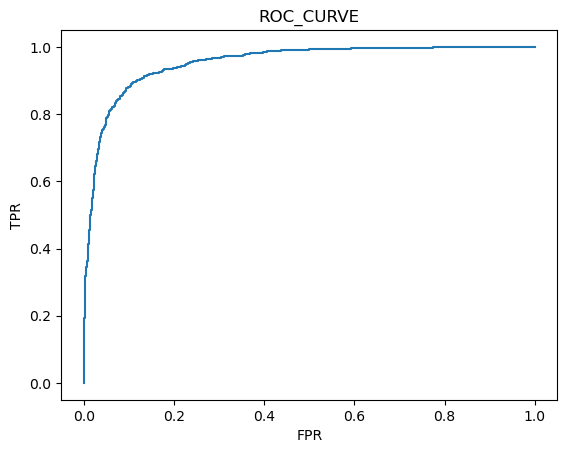

In [98]:
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_CURVE")
plt.show()

## Hyperparameter tuning and Cross Validation

In [99]:
reg = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1, 0.1, 0.01]
solver = ['liblinear', 'sag', 'saga']

In [100]:
params = dict(penalty = penalty, C = c_values, solver = solver)
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['liblinear', 'sag', 'saga']}

c_values is basically the inverse value of lambda used for regularisation

When we decrease c_values, regularisation strenghthens up (BY DEFAULT 1.0)

solver is basically the optimizer which we use. We use different solvers for different classifications like binomial or multiclass (BY DEFAULT lbfgs)

In [101]:
cv = StratifiedGroupKFold()
grid = GridSearchCV(estimator=reg, param_grid=params, scoring = 'accuracy', cv = cv)
print(grid)

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='accuracy')


In gridsearch, we can train our model for various paramaters

cv is cross-validation

In [102]:
grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [103]:
grid.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [104]:
grid.best_score_

nan

In [105]:
pred = grid.predict(x_test)

score = accuracy_score(pred, y_test)
cm = confusion_matrix(y_test, pred)
print(score, cm)
print(classification_report(y_test, pred))

0.8923333333333333 [[1329  155]
 [ 168 1348]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1484
           1       0.90      0.89      0.89      1516

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



In gridsearch cv it takes the combination of each parameter

Now we use Random search cv which picks paramaters at random

In [106]:
random = RandomizedSearchCV(estimator=reg, param_distributions=params, scoring='accuracy', cv=5)
random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'sag', 'saga']},
                   scoring='accuracy')

In [107]:
random.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}

In [108]:
pred = random.predict(x_test)

score = accuracy_score(pred, y_test)
cm = confusion_matrix(y_test, pred)
print(score, cm)
print(classification_report(y_test, pred))

0.895 [[1332  152]
 [ 163 1353]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1484
           1       0.90      0.89      0.90      1516

    accuracy                           0.90      3000
   macro avg       0.89      0.90      0.89      3000
weighted avg       0.90      0.90      0.90      3000



## Now for Multiclass

### Preparing data first

In [109]:
x, y = make_classification(n_samples=10000, n_features=10, n_classes=3, n_informative=3, random_state=42)


In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
x_train.shape, y_train.shape


((7000, 10), (7000,))

In [111]:
reg = LogisticRegression(multi_class='ovr')
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

In [112]:
score = accuracy_score(pred, y_test)
cm = confusion_matrix(y_test, pred)
print(score, cm)
print(classification_report(y_test, pred))

0.7306666666666667 [[904  73  11]
 [368 475 155]
 [122  79 813]]
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       988
           1       0.76      0.48      0.58       998
           2       0.83      0.80      0.82      1014

    accuracy                           0.73      3000
   macro avg       0.75      0.73      0.72      3000
weighted avg       0.75      0.73      0.72      3000

